# 第2章　教師あり学習の概要

---
## 2.1 導入
教師あり学習 (supervised learning) では、それぞれの問題に入力 (input)、出力 (ouput) として扱える変数が存在する。  
入力は分野により予測変数 (predictor)、独立変数 (independent variable)、特徴 (feature)などと呼ばれ、  
出力は応答変数 (response variable)、従属変数 (dependent variable)などと呼ばれる。  
  
---
## 2.2 変数の種類と用語
出力には量的変数 (quantitative variable)、質的変数 (qualitative variable) がある。  
質的変数はカテゴリ型変数 (categorical variable)、離散変数 (discrete variable)、因子 (factor)などと呼ばれることもある。  
  
予測問題は出力の種類によって異なる名称で呼ばれる。  
量的な出力を予測する問題は回帰 (regression) と呼ばれ、質的な出力を予測する問題は分類 (classification) と呼ばれる。  
これら2つのタスクには多くの共通点を有しており、共に関数近似 (function approximation) の問題とみなすことができる。  
  
3つ目の変数の種類として、 {小, 中, 大} といった順序付きカテゴリ型変数 (ordered categorical variable) がある。       
3つ以上のカテゴリがある場合、複数の数値化法が存在する。  
最もよく使われるものはダミー変数 (dummy variable) を用いる方法である。  
K水準の質的変数はK次元の二値ベクトルを使い、そのカテゴリに対応する要素を１，残りの要素を０として表現できる。  
  
本書では入力変数を $X$、その要素を $X_{j}$、量的な出力を $Y$、質的な出力を $G$ と表記する。
大文字かつ太字の変数は行列を表す。

---
## 2.3 予測のための2つの簡単なアプローチ：最小二乗法と最近傍法

線形モデルでは、入力ベクトル $X^{\mathrm{T}} = (X_{1}, X_{2}, \ldots, X_{p})$ が与えられた時、出力 $Y$ を  

\begin{align*}
\hat{Y} = \hat{\beta}_{0} + \sum_{j=1}^{p} X_{j} \hat{\beta}_{j}
\end{align*}

と予測する。ここで $\hat{\beta}_{0}$ は切片 (intercept) を表し、バイアス (bias) と呼ばれることもある。  
定数１を $X$ に加えてベクトル表記に変形すると

\begin{align*}
\hat{Y} = X^{\mathrm{T}}\hat{\beta}
\end{align*}

となり、内積の形に簡易化することができる。


###  2.3.1 最小二乗法 (least squares) 
残差二乗和  

\begin{align*}
RSS(\beta) = \sum_{i=1}^{N} (\hat{y}_{i} - f(x_{i}^{\mathrm{T}} \beta ))^{2}
\end{align*}

を最小にする $\beta$ を選択する。  
$RSS(\beta)$ はパラメータ $\beta$ の二次関数であるので必ず最小値が存在するが、一般に一意な解を得られる保証はない。  
上の式を行列表記すると  

\begin{align*}
RSS(\beta) = (\mathbf{y} - \mathbf{X}\beta)^{\mathrm{T}} (\mathbf{y} - \mathbf{X} \beta)
\end{align*}

となる。ここで $\mathbf{X}$ は各行が入力ベクトルに対応する $N \times p$ 行列、  
$\mathbf{y}$ は各要素が出力に対応する $N$ 次元ベクトルである。  
これを $\beta$ に関して偏微分すると、正規方程式 (normal equation)  

\begin{align*}
\mathbf{X}^{\mathrm{T}} (\mathbf{y} - \mathbf{X} \beta) = 0
\end{align*}

を得る。$\mathbf{X}^{\mathrm{T}}\mathbf{X}$ が特異でなければ、正規方程式の一意な解を  

\begin{align*}
\hat{\beta} = (\mathbf{X}^{\mathrm{T}} \mathbf{X})^{-1} \mathbf{X}^{\mathrm{T}} \mathbf{y}
\end{align*}

と求めることができる。  
$i$ 番目の入力 $x_{i}$ に当てはめた値は $\hat{y}_{i} = \hat{y}(X_{i}) = x_{i}^{\mathrm{T}}\hat{\beta}$ となり、任意の入力 $x_{0}$ に対して $x_{0}^{\mathrm{T}}\hat{\beta}$ が予測値となる。  
このような予測値を集めて構成される超平面は $p$ 次元パラメータ $\beta$ により特徴づけられる。    
  
　＊　  
  
次に、分類問題の枠組みで考える。  
２クラス分類問題では、出力のクラスを表す変数 $G$ は例えば青クラス／オレンジクラスの値をとる。  
応答変数 $Y$ を青クラスが0、オレンジクラスが1として線形モデルを当てはめ、
モデルの出力値 $\hat{Y}$ が  

\begin{align*}
\hat{G} = \begin{cases} &\text{orange} &\hat{Y}>0.5 \\
&\text{blue} &\hat{Y} \leq 0.5 \end{cases}
\end{align*}

とクラス変数 $G$ に変換されるものとする。  
図示したものは下の通り。

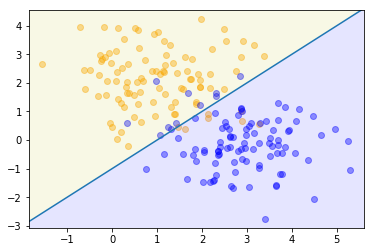

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

X1 = np.random.randn(100,2) + np.array([1,2])
X2 = np.random.randn(100,2) + np.array([3,0])
DBx = np.arange(np.min(X1[:,0])-3, np.max(X2[:,0])+3, 0.1)

plt.scatter(X1[:,0], X1[:,1], c='orange', marker="o", alpha=0.4)
plt.scatter(X2[:,0], X2[:,1], c='blue', marker="o", alpha=0.4)
plt.plot(DBx, DBx*1-1)

plt.fill_between(DBx, DBx+20, DBx*1-1, facecolor='y', alpha=0.1)
plt.fill_between(DBx, DBx*1-1, DBx-20, facecolor='b', alpha=0.1)
plt.xlim(np.min(X1[:,0])-0.3, np.max(X2[:,0])+0.3)
plt.ylim(np.min(X2[:,1])-0.3, np.max(X1[:,1])+0.3)

plt.show()

図中で２つのクラスの予測結果は、    
この場合線形な決定境界 (decision boundary) $\{ x : x^{\mathrm{T}}\hat{\beta} = 0.5 \}$ によって隔てられている。   
  
各クラスのデータがそれぞれ１つのガウス分布から生成されているとき、線形決定境界は最適な選択であり、  
２つのクラスの重なりはやむを得ず、予測に与える重複領域の悪影響を避けることはできない。  
  
一方、データが混合ガウス分布から生成されているとき、線形決定境界は一般に最適でない。  

---
### 2.3.2 最近傍法
最近傍法では $\hat{Y}$ を予測する際に、入力 $x$ に最も近い訓練データ集合の観測値を利用する。  
すなわち、$k$ 最近傍法による $\hat{Y}$ の予測は  

\begin{align*}
\hat{Y}(x) = \frac{1}{k} \sum_{x_{i} \in N_{k}(x)}y_{i}
\end{align*}

と定義される。  
ここで、$N_{k}(x)$ は訓練データのうち $x$ に近い $k$ 個の点 $x_{i}$ によって定義される近傍を表している。  
$k$ 最近傍法は近さの概念を用いるため、何らかの計量を定義する必要があるので、  
差し当たりユークリッド距離を用いることとする。  
  
  

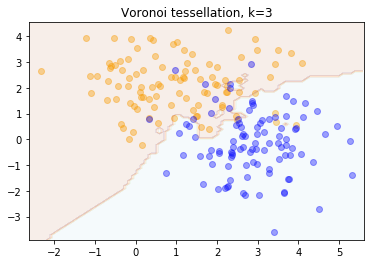

In [1]:
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# dataset : Orange=1, Blue=0
X1 = np.random.randn(100,2)*(1.3,1) + np.array([1,2])
X2 = np.random.randn(100,2)*(1,1.3) + np.array([3,0])
Orange_d = np.hstack((X1,np.array([[1]]*X1.shape[0])))
Blue_d = np.hstack((X2,np.array([[0]]*X2.shape[0])))
dataset = np.vstack((Orange_d, Blue_d))

# define distance
def cal_length(pos1, pos2, p=2):
    return np.sqrt(np.sum(np.power(pos1-pos2, 2)))
    

# predict label by k-nearest neighbor algorithm
def predict_label(pos, k=3, dataset=dataset, epsilon=1e-5):
    length_list = []
    label_votes={}
    
    for i,data in enumerate(dataset):
        l = cal_length(pos, data[:2])
        length_list.append([l,data[2]])
        
    #length_list.sort(key=lambda x:x[1]).reverse()
    length_list.sort(key=itemgetter(0))
    
    for _,label in length_list[:k]:
        label_votes[int(label)] = label_votes.get(int(label), 0) + 1
        
    return max(label_votes.items(), key=lambda x:x[1])[0]
    
# plot
plt.scatter(X1[:,0], X1[:,1], c='orange', marker="o", alpha=0.4)
plt.scatter(X2[:,0], X2[:,1], c='blue', marker="o", alpha=0.4)

Xg = np.arange(np.min(dataset[:,:2])-0.31, np.max(dataset[:,:2])+0.31, 0.1)
Yg = np.arange(np.min(dataset[:,:2])-0.31, np.max(dataset[:,:2])+0.31, 0.1)
XG,YG = np.meshgrid(Xg,Yg)
G = np.stack((XG.reshape(-1),YG.reshape(-1)), axis=1)
ZG = np.array([predict_label((x,y)) for x,y in G]).reshape(XG.shape)

plt.contourf(Xg, Yg, ZG, cmap=plt.cm.Paired, alpha=0.1)

plt.xlim(np.min(X1[:,0])-0.3, np.max(X2[:,0])+0.3)
plt.ylim(np.min(X2[:,1])-0.3, np.max(X1[:,1])+0.3)
plt.title("Voronoi tessellation, k={}".format(3))

plt.show()

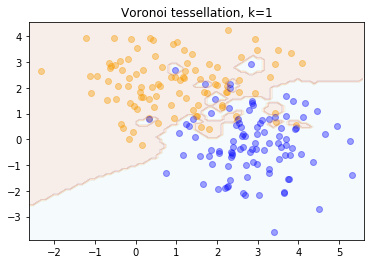

In [2]:
# plot, k=1
plt.scatter(X1[:,0], X1[:,1], c='orange', marker="o", alpha=0.4)
plt.scatter(X2[:,0], X2[:,1], c='blue', marker="o", alpha=0.4)

Xg = np.arange(np.min(dataset[:,:2])-0.31, np.max(dataset[:,:2])+0.31, 0.1)
Yg = np.arange(np.min(dataset[:,:2])-0.31, np.max(dataset[:,:2])+0.31, 0.1)
XG,YG = np.meshgrid(Xg,Yg)
G = np.stack((XG.reshape(-1),YG.reshape(-1)), axis=1)
ZG = np.array([predict_label((x,y),k=1) for x,y in G]).reshape(XG.shape)

plt.contourf(Xg, Yg, ZG, cmap=plt.cm.Paired, alpha=0.1)

plt.xlim(np.min(X1[:,0])-0.3, np.max(X2[:,0])+0.3)
plt.ylim(np.min(X2[:,1])-0.3, np.max(X1[:,1])+0.3)
plt.title("Voronoi tessellation, k={}".format(1))

plt.show()

最小二乗法のパラメータ数が $p$ であるのに対し、  
最近傍法の有効パラメータ数は $N/k$ であることが知られている。  

---
### 2.3.3 最小二乗法から最近傍法へ
最小二乗法による線形当てはめは、分散が小さく、バイアスが大きい。  
k最近傍法は分散が大きく、バイアスが小さい。  
現代のデータ分析に使われる方法の多くは、これら２つの手法から派生したものである。  

---
## 2.4 統計的決定理論
モデルを系統的に理解するため、理論の導入を行う。  
はじめに量的な出力 $Y$ について考える。
  
$X \in \mathbb{R}^{p}$ を実数の確率入力ベクトル、$Y \in \mathbb{R}$ を実数の確率出力変数とし、  
これらが同時確率分布 $Pr(X,Y)$ に従うとする。   
入力 $X$ が与えられたとき、$Y$ を予測する関数 $f(X)$ を見つけることが目標となる。   
また、予測に対する罰則を定義するため損失関数 $L(Y,f(X))$ を導入する。    
  
損失関数のうち、二乗誤差損失 (squared error loss) $L(Y,f(X)) = (Y-f(X))^{2}$ が最も頻用される。  
二乗誤差損失を用いると、$f$ を選ぶ基準として、期待(二乗)予測誤差  

\begin{align*}
EPE(f) &= E(Y-f(X))^{2} \\
&= \int [y-f(x)]^{2} Pr(dx,dy)
\end{align*}

を用いることになる。同時分布を $X$ で条件付けすることにより、EPEは

\begin{align*}
EPE(f) = E_{X}E_{Y|X} ([Y-f(X)]^{2} | X)
\end{align*}

と表される。よってEPEを最小化するには、各 $x$ について最小化を行えばよく

\begin{align*}
f(x) = \underset{c}{\operatorname{argmin}} E_{Y|X} ([Y-c]^{2}|X=x)
\end{align*}

と求められる。この解は条件付き期待値

\begin{align*}
f(x) = E(Y|X=x)
\end{align*}

であり、回帰関数 (regression function) と呼ばれることもある。

---
最近傍法は、訓練データを用いて条件付き期待値を直接推定する方法と解釈できる。    
ある点 $x$ について条件付き期待値を推定するには  
入力が $x_{i}=x$ となっている訓練データを集め、対応する $y_{i}$ の平均を推定値とすればよいが、   
ちょうど $x_{i}=x$ となる観測値はたかだか１つであるため、$k$ 最近傍法では  

\begin{align*}
\hat{f}(x) = Ave(y_{i}|x_{i}\in N_{k}(x))
\end{align*}

によってこの問題を近似している。ここで、Aveは平均、  
$N_{k}(x)$ は $x$ に最も近い集合 $\mathcal{T}$ 内の $k$ 個の訓練データにより定義される近傍である。  
この近似は  
 - 期待値を標本データの平均により近似する  
 - 任意の点 $x$ を、その点の近傍領域によって近似する  

という２つの近似を含んでいる。  

訓練データ $N$ が大きければ、近傍点が $x$ の近くに位置すると考えてよい。   
同時分布 $Pr(X,Y)$ に関する緩やかな正則条件のもとで   
$k/N \rightarrow 0$ となるように $N,k \rightarrow \infty$ とすれば $\hat{f} \rightarrow E(Y|X=x)$ となることを証明できる。  
すなわち、十分な大きさの訓練データがあれば、これは万能な近似モデルとして扱うことができる。  
  
ただし現実には十分な大きさのデータを得られない状況が多く、  
データに関する仮定そのものもデータから推測する必要がある。  

---
線形回帰について同様に考える。  
簡便のため、回帰関数 $f(x)$ が近似的に $x$ の線形関数として

\begin{align*}
f(x) \approx x^{T}\beta
\end{align*}

と表されると仮定する。このような考え方はモデルに基づくアプローチと呼ばれる。  
  
線形モデル $f(x)$ を期待予測誤差 $EPE(f)$ に代入し、これを $\beta$ に関して偏微分したものを０とおくと、

\begin{align*}
\beta = [E(XX^{T})]^{-1}E(XY)
\end{align*}

と表すことができる。

---
上記２つの手法はともに、条件付き期待値を訓練データに関する平均で近似する手法とみなすことができる。  
ただし、モデルの仮定が異なり、  
 - 最小二乗法では $f(x)$ が大域的な線形関数によって上手く近似できると仮定している。
 - $k$ 最近傍法では $f(x)$ が局所的な定数関数によって上手く近似できると仮定している
 
後者は前者に比べ柔軟であるが、推定がより不安定である。  

---
出力がカテゴリ型変数 $G$ である場合にも  
損失関数を適切に選ぶことで定量化すれば同様の議論が成り立つ。    
   
推定値 $\hat{G}$ が$K$ 個のクラスカテゴリ $\mathcal{G}$ のいずれかの値を取る、すなわち $K=card(\mathcal{G})$ とする。  
この場合の損失関数は対角成分が0、非対角成分が非負の $K \times K$ 行列 $\mathbf{L}$ であり、  
その要素 $L(k,l)$ はクラス $\mathcal{G}_{k}$ の観測値をクラス $\mathcal{G}_{l}$ と誤って分類した時の罰則を表している。  
  
全ての誤分類に対して罰則として１を課したものは 0/1 損失関数と呼ばれる。  
このとき期待予測誤差は  

\begin{align*}
EPE = E[L(G,\hat{G}(X))]
\end{align*}

で与えられる。  
  
期待値は同時分布 $Pr(X,Y)$ に関するものであるので、先の議論と同様に条件付けを行うと、
期待予測誤差は

\begin{align*}
EPE = E_{X} \sum_{k=1}^{K} L (\mathcal{G}_{k}, \hat{G}(X)) Pr(\mathcal{G}_{k}|X)
\end{align*}

となるので、

\begin{align*}
\hat{G}(x) = \underset{g \in \mathcal{G}}{\operatorname{argmin}} \sum_{k=1}^{K} L(\mathcal{G}_{k}, g) Pr(\mathcal{G}_{k}|X=x)
\end{align*}

と、入力 $X$ の各点ごとに期待予測誤差を最小化すればよい。
  
損失関数として0/1損失関数を用いる場合は

\begin{align*}
\hat{G}(x) &= \underset{g \in \mathcal{G}}{\operatorname{argmin}} [1 - Pr(g|X=x)] \\
&= \mathcal{G}_{k} \,\left( \text{if} \, Pr(\mathcal{G}_{k}|X=x) = \max_{g\in\mathcal{G}} Pr(g|X=x) \right)
\end{align*}

と表すことができる。  
この解は離散的な条件付き確率 $Pr(G|X)$ を用いて最も確からしいクラスに分類する妥当なものとなっており、  
**ベイズ分類器** (Bayes classifier) と呼ばれている。  

---
## 2.5 高次元での局所的手法
高次元において、上記手法による条件付き期待値の近似がどうなるか検討する。

いま、p次元単位立方体の中に入力が一様に分布している状況で、ここに最近傍法を適用することを考える。  
目標点を中心とする超立方体を近傍と見なし、  
近傍データ数が全データの割合 $r$ を含むように一辺の長さを設定するとき、その長さの期待値は  

\begin{align*}
e_{p}(r) = r^{1/p}
\end{align*}

でなければならない。  
このとき、１つの近傍は入力データ中のある変数について、その $e_{p}(r)$ をカバーすることになる。
  
例えば全データの1%を１つの近傍に含めるとき、次元数が10であったとすると  
$e_{10}(0.01)=0.63$ となり、もはや局所的なものとして扱うことができない。  

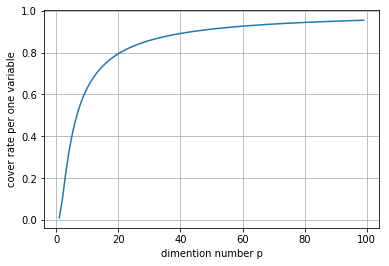

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def vol_rate(p, r=0.01):
    return np.power(r,1/p)

X = np.arange(1,100,1)

plt.plot(X,vol_rate(X))
plt.xlabel("dimention number p")
plt.ylabel("cover rate per one variable")
plt.grid()
plt.show()

また、高次元空間では入力データの密度が低次元の場合に比べ疎となり、  
近傍の定義に用いる距離についても重大な問題が生じる。  
  
いま、原点を中心とする $p$ 次元超立方体内に $N$ 個のデータが一様分布しているとする。  
原点からのユークリッド距離 $x$ (超立方体の頂点を1とする) までに含まれるデータの個数を左下図に、   
原点からの距離の最大値を最小値で割った比率を右下図に示す。  

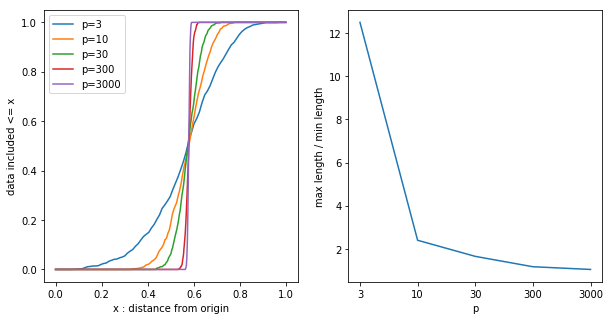

In [130]:
import numpy as np
import matplotlib.pyplot as plt

def f(N,p):
    dataset = np.random.rand(N,p)-0.5
    d_list = np.sqrt(np.sum(dataset**2, axis=1))
    dist = [len(np.where(d_list<=x)[0]) for x in np.arange(0,np.sqrt(p)/2,0.01)]
    
    return dist, np.max(d_list)/np.min(d_list)


fig, (ax1, ax2) = plt.subplots(1,2, sharex=False, figsize=(10,5))
N=1000
dist_l=[]

for p in [3,10,30,300,3000]:
    dist, l = f(N,p)
    ax1.plot(np.arange(0,np.sqrt(p)/2,0.01)/(np.sqrt(p)/2), np.array(dist)/N, label="p={}".format(p))
    dist_l.append(l)

ax1.legend()
ax1.set_xlabel("x : distance from origin")
ax1.set_ylabel("data included <= x")
ax2.plot(dist_l)

ax2.set_xlabel("p")
ax2.set_ylabel("max length / min length")
ax2.set_xticklabels([0,3,10,30,300,3000])
plt.show()

図より、$p$ を大きくするにつれて、データがより狭い範囲に集中し、  
原点からの距離の最大値と最小値の比率も急激に縮小することがわかる。  

このため
 - ほとんどのデータ点において最近傍点が近傍に含まれない
 - 距離に基づく損失関数が常にほぼ同じ値を返すようになり、学習が進まなくなる

という問題が生じる。  
これらの現象は**次元の呪い**と呼ばれている。  